<a href="https://colab.research.google.com/github/hongsunjang/hands-on-ML/blob/main/Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

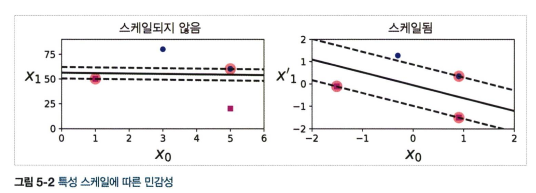

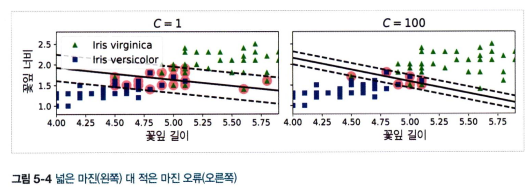

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][: , (2,3)] # 꽃잎 길이, 꽃잎 너비reshaping 3,4 column만 사용
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
                    ('scaler', StandardScaler()), # scaling-train set중앙에 맞춘다.
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

#iris['data']

In [ ]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5,1.7]])

array([1.])

# linear SVC를 사용하는 여러가지 방법
1. SVC(kenel = 'linear', C= 1) 
2. SGDClassifier(loss = 'hinge', alpha=1/(m*C))
## 하지만 linearSVC가 가장 빠르다는 걸 기억하자

# 비선형 SVM 분류
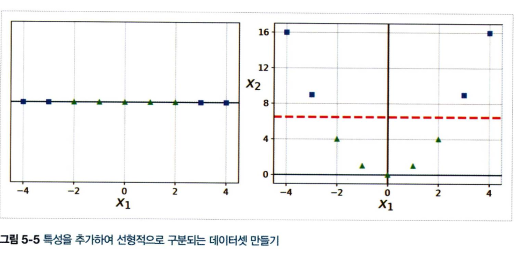

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)

polynomial_svm_clf = Pipeline([
                               ('poly_features', PolynomialFeatures(degree=3)),
                               ('scaler', StandardScaler()),
                               ('svm_clf', LinearSVC(C= 10, loss = 'hinge'))
])

In [ ]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# 비선형 커널을 다루는법 1
## Kenel trick =>  다항식 특성 추가를 빠른 연산
1. 낮은 차수 -> 복잡한 특성 모름
2. 높은 차수 -> 너무 큰 연ㅏㄴ

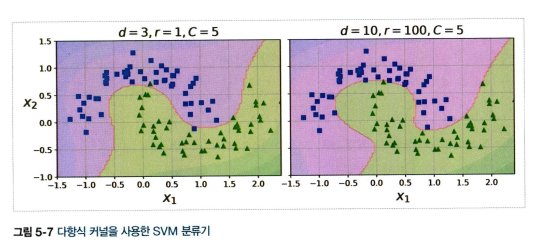

In [ ]:
from sklearn.svm import SVC 
poly_kernel_clf = Pipeline([
                            ('scaler', StandardScaler()),
                            ('svm_clf', SVC(kernel='poly', 
                                            degree = 3, # 3차 다항식
                                            coef0=1, # 모델이 높은 차수와 낮은차수에 얼마나 영향받는지
                                                     # 최고차항의 계수!!
                                            C=5))
])

In [ ]:
poly_kernel_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# 비선형 커널을 다루는 법 2
## 유사도 특성
sample이 landmark와 얼마나 닮았는지
similarity function으로 계산한다.
대표적인 유사도 함수 RBF(radial basis function)

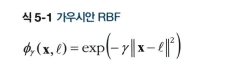

 => RBF : 랜드마크에서 멀리 떨어진 경우 0, 랜드마크와 같은 위치인 경우 1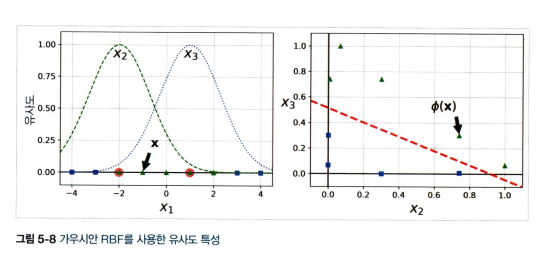

In [ ]:
rbf_kernel_svm_clf = Pipeline([
                               ('scaler', StandardScaler()),
                               ('svm_clf', SVC(kernel='rbf', 
                                               gamma= 5,
                                               C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

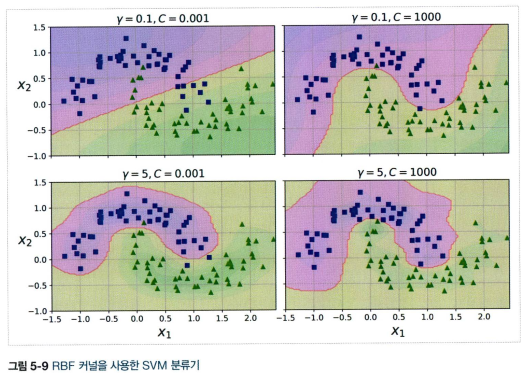

감마(gamma)값에 따라 커지면 종 모양 그래프가 좁아진다(분산의 역수) 
감마가 클수록
각 샘플을 따라 구불구불하게 휘어집니다. 왜냐하면 각샘플의 영향 범위가 작아지기 떄문입니다.


# 왜 각 kernel의 계산 복잡도
1. LinearSVC
  => 선형 SVM에 최적화된 liblinear 라이브러리를 사용
  => 커널 트릭은 지원하지 않지만 샘플, 특성수에 linear

2. SVC
  => 커널 트릭 알고리즘 libsvm 라이러리
  => 훈련시간은 샘플 수에 quardra, qubic

# SVM을 회귀에 적용하는 법 => SVR
도로폭에 가능한 많은 샘플이 들어가도록 학습한다.

입실론= margin

linearSVR은 
입실론-insenitive 하다. => 마진 안의 데이터에train data가 추가되어도 모델 예측에 변화가 없다! 
 => 왜냐하면 도로폭을 결정해 버리면 C값을 조절할 필요가 없기 때문입니다!!

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

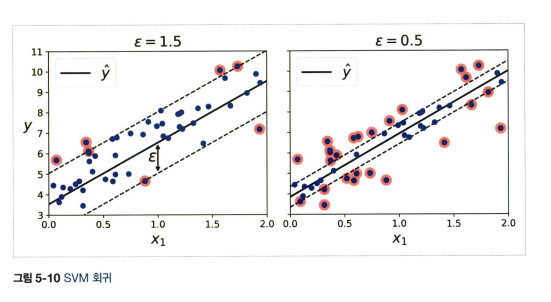

## 다항 SVM을 활용해 회귀를 진행할 수 있습니다.
linearSVR과 달리 C와 epsilon을 자유롭게 조절할 수 있습니다.

고차원 SVM은 도로폭을 epsilon값으로 고정하면서 C값을 다양하게 조절이 가능합니다.

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree = 2, C = 100 , epsilon = 0.1)
svm_poly_reg.fit(X,y )

SVR(C=100, degree=2, kernel='poly')

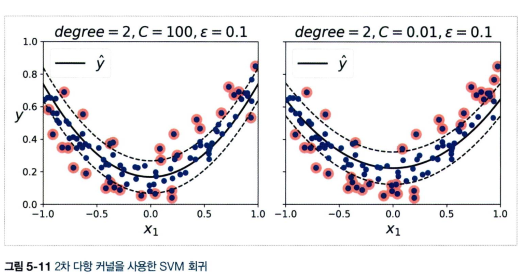

# SVM 이론
2차원의 input데이터에 대한 결정함수 값은 다음과 같이 3차원 평면으로 나타낼 수 있고


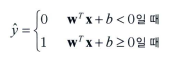

결정함수의 값을 다음과 같이 정의한다면 결정경계는 아래 그림과 같다고 할 수 있습니다.

우리는 하드 마진이나 소프트 마진의 정의를 바탕으로 가능한 마진을 크게하는 w와 b를 찾는 과정입니다.

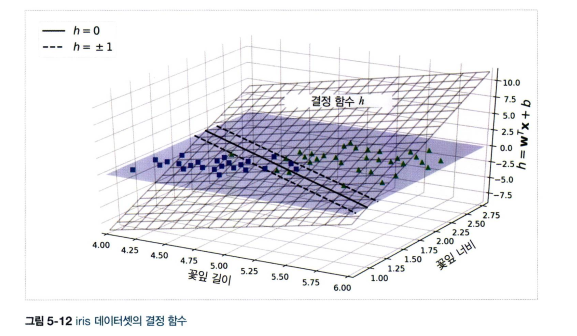

결정함수의 기울기는 가중치의 norm값입니다.

따라서 가중치 벡터가 작을수록 마진은 커집니다. = support vector 값

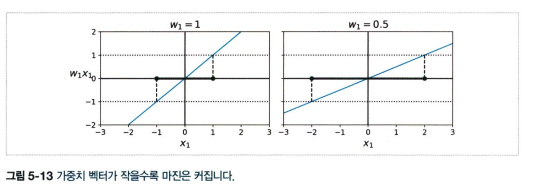

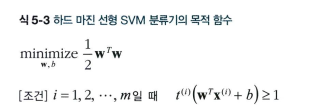

t^(i)값은 음성 샘플일때 -1, 양성 샘플일 때 1입니다. 우리는 이런 상황에서 w를 최소화하면 됩니다. 이때 w는 0에서 미분가능하지 않으므 w의 quadratic값을 사용합니다.

그럼 목적함수는 다음과 같이 작성할 수 있습니다.

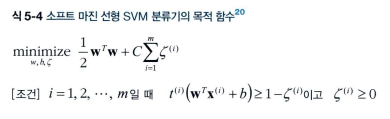

이때 C는 당연히 위에서 봤던 값이고 이상한기호는 \zeta라고 읽고 slack variable이라고 합니다.

slack variable은 각 샘플이 마진을 얼마나 위반할지를 결정합ㅣ다. 다라서 
마진 오류를 최소화하면서 마진을 최대한 크게하기 위해 w값을 최소화하는것입니다.

C는 두 관계사이의 tradeoff를 결정하기 때문에 만약 C가 크면 마진오류에 큰 힘을 실어주기 때문에 결과적으로 나오는 margin(도로 폭)이 상대적으 작아집니다

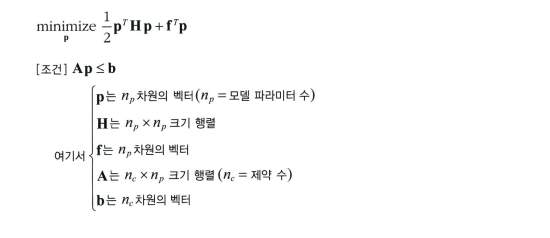

n_p = n+1 ,n는 특성 수 1 은 bias -> 학습하고자 하는 결과 (p 벡터)

n_c = m , m은 훈련 샘플 수 => 훈련 sample과 p를 곱했을 때 제약 b를 넘으면안된ㅏ

H는 단위행렬

f 는 n_p차원의 0 벡터 => 
## f가 0벡터인 이유를 모르겠다

b 는 n_c차원의 1 벡터

A는 훈련 샘플 X p vector

우리는 이미 있는 quadratic programming에 param을 전달한다.

#=> 소프트 마진의 경우도 이런 방식으로 풀수 있다 (연습문제)

# primal problem -> dual problem(쌍대문제)

# Kernel SVM
input data는 2차원 데이터 셋이고
 2차 다항식 변환(여러가지 변환)을 적용하고 선형 SVM 분류기에 어떻게 적용하는것일까?
 매핑함수를 적용하면 2차원이 아니라 3차원이 된다. 하지만
 a^2 dot b^2 = (a dot )^2 이 항상 성립한다.
 하지만 쌍대 문제에는 점곱을 간단하게 바꿀 수 있기 때문에 실제 훈련샘플을 변환하지 않고 사용한다. 따라서 SVM을 적용하고 변환하는 것과 완전히 같다.



# 머신러닝에서 Kernel
변환함수를 계산하지 않고 원래 벡터에 기반하여 점곱을 계산할 수 있는 함수
대표적으로 다항변환
1. 선형
2. 다항식
3. 가우시안 RBF
4. 시그모이드

# Mercer's Thereom

머서의 조건: 연속, 대칭, ... 몇가지 수학조건

을 만족하면 행렬 dot product가 변환함수를 모르더라도 사용할 수 있다.
이때 가우시안 RBF 함수는 무한 차원의 공간에 매핑하는 것이기 때문에 실제 매핑하지 않고 계산할 수 있는게 다행이다

일부 커널(시그모이드)는 머서 조건을 따르지 않지만 실전에서는 근사해서 잘 동작한다

# 온라인 학습 SVM

loss function으로 hinge loss를 사용(아까 봤던 ζ )

이 비용함수 는 다음과 같다.
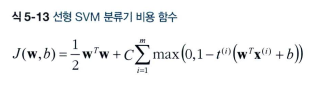

# hinge loss
max(0, 1-t) 함수
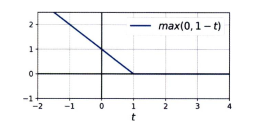

 hinge loss값은 마진오류로 사용되며 도로 경계선까지의 거리에 비례하는 값을 가진다.

In [ ]:
d